In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/vrunda/NLP/STOCK-PRICE-PREDICTION-SLACK_LSTM/data/ASIANPAINT.csv")

In [3]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.00,390.00,370.00,385.00,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.00,392.00,375.00,390.00,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.50,390.00,371.50,383.00,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.90,384.90,374.50,375.10,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.00,390.00,370.00,389.00,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,2020-11-23,ASIANPAINT,EQ,2166.55,2160.55,2196.95,2138.80,2188.00,2186.25,2158.20,4002609,8.638445e+14,121561.0,2465120.0,0.6159
5200,2020-11-24,ASIANPAINT,EQ,2186.25,2192.90,2231.00,2191.00,2205.00,2207.90,2215.45,2954306,6.545112e+14,119163.0,1436478.0,0.4862
5201,2020-11-25,ASIANPAINT,EQ,2207.90,2197.25,2208.70,2150.00,2156.00,2154.30,2172.26,1682365,3.654528e+14,79887.0,613963.0,0.3649
5202,2020-11-26,ASIANPAINT,EQ,2154.30,2160.00,2177.45,2117.15,2160.00,2155.30,2139.91,2247478,4.809392e+14,85597.0,858868.0,0.3821


In [4]:
df1=df['Close']

In [5]:
df1

0        381.65
1        385.55
2        383.00
3        377.50
4        385.70
         ...   
5199    2186.25
5200    2207.90
5201    2154.30
5202    2155.30
5203    2215.30
Name: Close, Length: 5204, dtype: float64

<AxesSubplot:>

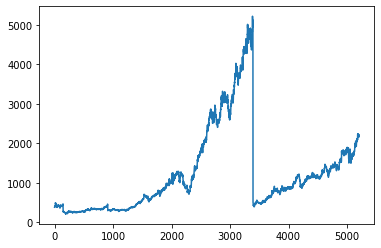

In [6]:
df1.plot()

In [7]:
## Lstm is sensitive to scale of the data, so we apply min max scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.03416394],
       [0.03494358],
       [0.03443382],
       ...,
       [0.38852739],
       [0.3887273 ],
       [0.40072166]])

In [10]:
# spliting the dataset into train and test

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
# Convert an array of values into dataset matrix

def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [12]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [13]:
X_train

array([[0.03416394, 0.03494358, 0.03443382, ..., 0.04222016, 0.04264995,
        0.04348956],
       [0.03494358, 0.03443382, 0.03333433, ..., 0.04264995, 0.04348956,
        0.04195028],
       [0.03443382, 0.03333433, 0.03497356, ..., 0.04348956, 0.04195028,
        0.04305976],
       ...,
       [0.86266455, 0.86592302, 0.85826661, ..., 0.89119114, 0.89202075,
        0.90993233],
       [0.86592302, 0.85826661, 0.86922147, ..., 0.89202075, 0.90993233,
        0.91398043],
       [0.85826661, 0.86922147, 0.86854179, ..., 0.90993233, 0.91398043,
        0.93231181]])

In [14]:
print(X_train.shape),print(y_train.shape)

(3281, 100)
(3281,)


(None, None)

In [15]:
# reshape the input to be [samples,time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [16]:
# create a standard lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
52/52 [==============================] - 10s 200ms/step - loss: 0.0088 - val_loss: 1.8315e-04
Epoch 2/100
52/52 [==============================] - 8s 146ms/step - loss: 4.0429e-04 - val_loss: 1.3615e-04
Epoch 3/100
52/52 [==============================] - 9s 177ms/step - loss: 2.7594e-04 - val_loss: 1.2529e-04
Epoch 4/100
52/52 [==============================] - 9s 164ms/step - loss: 2.7430e-04 - val_loss: 1.7456e-04
Epoch 5/100
52/52 [==============================] - 8s 161ms/step - loss: 2.7986e-04 - val_loss: 1.2148e-04
Epoch 6/100
52/52 [==============================] - 9s 164ms/step - loss: 2.5990e-04 - val_loss: 1.5004e-04
Epoch 7/100
52/52 [==============================] - 9s 164ms/step - loss: 2.5269e-04 - val_loss: 1.2044e-04
Epoch 8/100
52/52 [==============================] - 8s 162ms/step - loss: 2.3000e-04 - val_loss: 1.3238e-04
Epoch 9/100
52/52 [==============================] - 8s 159ms/step - loss: 2.2731e-04 - val_loss: 1.7910e-04
Epoch 10/100
52/52 [==

52/52 [==============================] - 10s 197ms/step - loss: 5.4662e-05 - val_loss: 2.7261e-05
Epoch 76/100
52/52 [==============================] - 11s 210ms/step - loss: 5.6451e-05 - val_loss: 2.8501e-05
Epoch 77/100
52/52 [==============================] - 10s 185ms/step - loss: 1.2502e-04 - val_loss: 5.2336e-05
Epoch 78/100
52/52 [==============================] - 10s 201ms/step - loss: 5.1088e-05 - val_loss: 2.5927e-05
Epoch 79/100
52/52 [==============================] - 9s 171ms/step - loss: 4.4684e-05 - val_loss: 4.3701e-05
Epoch 80/100
52/52 [==============================] - 9s 176ms/step - loss: 5.2614e-05 - val_loss: 2.4457e-05
Epoch 81/100
52/52 [==============================] - 10s 184ms/step - loss: 6.2895e-05 - val_loss: 2.4711e-05
Epoch 82/100
52/52 [==============================] - 9s 182ms/step - loss: 4.3662e-05 - val_loss: 3.0851e-05
Epoch 83/100
52/52 [==============================] - 7s 143ms/step - loss: 4.8506e-05 - val_loss: 3.3891e-05
Epoch 84/100
52/52

In [21]:
# lets do  the prediction and check performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
# transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
# caluclate rmse
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1830.2094549412718

In [24]:
math.sqrt(mean_squared_error(y_test,test_predict))

1229.7249200360925

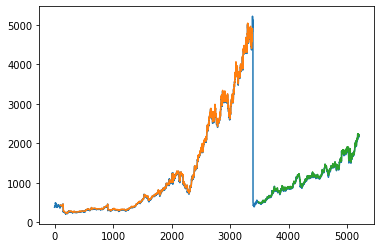

In [26]:
# plotting

look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
# shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
# ploting baseline
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
                 

# PRediction for next 30 days by considering the previous 100 days

In [28]:
len(test_data)

1822

In [29]:
x_input=test_data[1722:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format (i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.4005735]
101
1 day input [0.29883955 0.29539117 0.29204274 0.29635072 0.30128839 0.30802523
 0.3025578  0.29686048 0.30326746 0.30011894 0.31333273 0.30963447
 0.3057363  0.306376   0.30080862 0.29880956 0.30049877 0.30096854
 0.30321749 0.31895009 0.31417234 0.31561166 0.31715094 0.31821044
 0.31821044 0.32503723 0.33251372 0.33483263 0.33267364 0.34928584
 0.35011545 0.35780183 0.35196458 0.35418353 0.34930583 0.33751137
 0.35354383 0.34647716 0.35328396 0.34895599 0.35410357 0.34975561
 0.35349386 0.36898658 0.36486851 0.36391896 0.36119024 0.36010075
 0.35927114 0.36335922 0.35219447 0.34518776 0.34699691 0.34135956
 0.34280888 0.346807   0.34967565 0.35496317 0.36576809 0.36327926
 0.37567343 0.37867202 0.37540356 0.36779714 0.37324458 0.37060582
 0.37194519 0.37576339 0.36991614 0.3716953  0.38137076 0.38053115
 0.3776525  0.38172059 0.37376433 0.39722331 0.3895769  0.40275071
 0.39996202 0.39223565 0.38859736 0.39155597 0.4053195  0.39947225
 0.40270073 0.39761312 0.39400482 

8 day output [[0.42803976]]
9 day input [0.30326746 0.30011894 0.31333273 0.30963447 0.3057363  0.306376
 0.30080862 0.29880956 0.30049877 0.30096854 0.30321749 0.31895009
 0.31417234 0.31561166 0.31715094 0.31821044 0.31821044 0.32503723
 0.33251372 0.33483263 0.33267364 0.34928584 0.35011545 0.35780183
 0.35196458 0.35418353 0.34930583 0.33751137 0.35354383 0.34647716
 0.35328396 0.34895599 0.35410357 0.34975561 0.35349386 0.36898658
 0.36486851 0.36391896 0.36119024 0.36010075 0.35927114 0.36335922
 0.35219447 0.34518776 0.34699691 0.34135956 0.34280888 0.346807
 0.34967565 0.35496317 0.36576809 0.36327926 0.37567343 0.37867202
 0.37540356 0.36779714 0.37324458 0.37060582 0.37194519 0.37576339
 0.36991614 0.3716953  0.38137076 0.38053115 0.3776525  0.38172059
 0.37376433 0.39722331 0.3895769  0.40275071 0.39996202 0.39223565
 0.38859736 0.39155597 0.4053195  0.39947225 0.40270073 0.39761312
 0.39400482 0.39202575 0.39365498 0.39458455 0.39519426 0.3968135
 0.3900067  0.39097624 0.39

16 day output [[0.45424336]]
17 day input [0.30049877 0.30096854 0.30321749 0.31895009 0.31417234 0.31561166
 0.31715094 0.31821044 0.31821044 0.32503723 0.33251372 0.33483263
 0.33267364 0.34928584 0.35011545 0.35780183 0.35196458 0.35418353
 0.34930583 0.33751137 0.35354383 0.34647716 0.35328396 0.34895599
 0.35410357 0.34975561 0.35349386 0.36898658 0.36486851 0.36391896
 0.36119024 0.36010075 0.35927114 0.36335922 0.35219447 0.34518776
 0.34699691 0.34135956 0.34280888 0.346807   0.34967565 0.35496317
 0.36576809 0.36327926 0.37567343 0.37867202 0.37540356 0.36779714
 0.37324458 0.37060582 0.37194519 0.37576339 0.36991614 0.3716953
 0.38137076 0.38053115 0.3776525  0.38172059 0.37376433 0.39722331
 0.3895769  0.40275071 0.39996202 0.39223565 0.38859736 0.39155597
 0.4053195  0.39947225 0.40270073 0.39761312 0.39400482 0.39202575
 0.39365498 0.39458455 0.39519426 0.3968135  0.3900067  0.39097624
 0.39491439 0.39924236 0.38852739 0.3887273  0.40072166 0.40057349
 0.40468404 0.4079692

25 day output [[0.48197353]]
26 day input [0.32503723 0.33251372 0.33483263 0.33267364 0.34928584 0.35011545
 0.35780183 0.35196458 0.35418353 0.34930583 0.33751137 0.35354383
 0.34647716 0.35328396 0.34895599 0.35410357 0.34975561 0.35349386
 0.36898658 0.36486851 0.36391896 0.36119024 0.36010075 0.35927114
 0.36335922 0.35219447 0.34518776 0.34699691 0.34135956 0.34280888
 0.346807   0.34967565 0.35496317 0.36576809 0.36327926 0.37567343
 0.37867202 0.37540356 0.36779714 0.37324458 0.37060582 0.37194519
 0.37576339 0.36991614 0.3716953  0.38137076 0.38053115 0.3776525
 0.38172059 0.37376433 0.39722331 0.3895769  0.40275071 0.39996202
 0.39223565 0.38859736 0.39155597 0.4053195  0.39947225 0.40270073
 0.39761312 0.39400482 0.39202575 0.39365498 0.39458455 0.39519426
 0.3968135  0.3900067  0.39097624 0.39491439 0.39924236 0.38852739
 0.3887273  0.40072166 0.40057349 0.40468404 0.40796921 0.41123453
 0.41453898 0.41788021 0.42125231 0.42464367 0.42803976 0.43142638
 0.43479112 0.4381251

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
len(df1)

5204

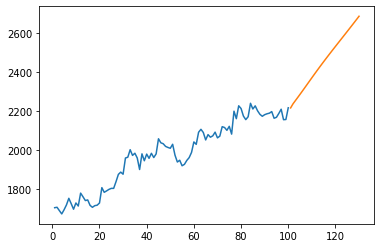

In [34]:
plt.plot(day_new,scaler.inverse_transform(df1[5104:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

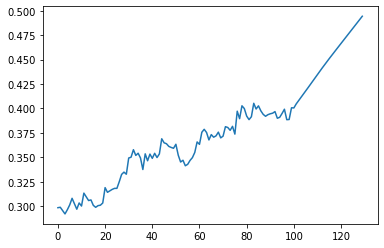

In [35]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5104:])

In [36]:
df3=scaler.inverse_transform(df3).tolist()

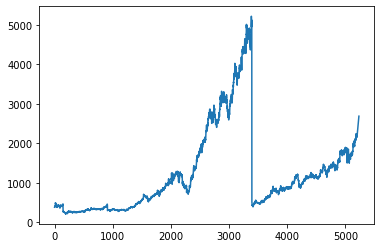

In [37]:
plt.plot(df3)